# Análise de datos do Coronavirus con Pandas
#### _Fonte: Johns Hopkins University Center for Systems Science and Engineering_ 
###### https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [233]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
NUM_CASOS=1000

fileFalecementos="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
fileContaxios="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
fileRecuperacions="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
allData=pd.read_csv(fileFalecementos,usecols = lambda column : column not in ["Lat" , "Long"],keep_default_na=False)

#Data dos datos
_,colHoxe=allData.shape
hoxe=allData.columns[colHoxe-1]

#Correximos os datos que veñen desagregados por provincias
allDataCor=allData.groupby('Country/Region').sum().reset_index()
allDataCor


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,3,3,3,3,3
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
185,Yemen,0,0,0,0,0,0,0,0,0,...,33,33,39,42,44,49,53,57,65,77
186,Zambia,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


#### Métodos Descriptivos do DataFrame

In [234]:
#Descrición Data Frame
allDataCor.info()
allDataCor.describe()
allDataCor.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Columns: 131 entries, Country/Region to 5/30/20
dtypes: int64(130), object(1)
memory usage: 192.5+ KB


(188, 131)

### Representación da Serie Temporal dun País

In [273]:
allData2=allDataCor.melt(id_vars='Country/Region',var_name='Día',value_name='Valor')
#Recollemos a serie a partir do día en que aconteceu o caso NUM_CASOS
Pais="Germany"
dataPais=allData2.loc[(allData2['Valor']>NUM_CASOS) & (allData2['Country/Region']==Pais)]
dataPais

,Country/Region,Día,Valor
13414,Germany,4/2/20,1107
13602,Germany,4/3/20,1275
13790,Germany,4/4/20,1444
13978,Germany,4/5/20,1584
14166,Germany,4/6/20,1810
14354,Germany,4/7/20,2016
14542,Germany,4/8/20,2349
14730,Germany,4/9/20,2607
14918,Germany,4/10/20,2767
15106,Germany,4/11/20,2736


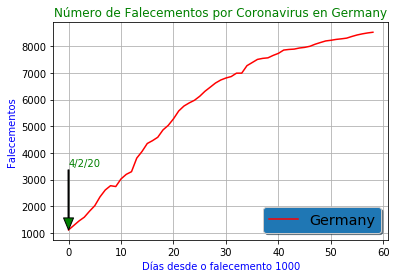

In [274]:
primerDia=list(dataPais['Día'])[0]
numDias, _ = dataPais.shape
dias=np.arange(0,numDias)
fig, ax = plt.subplots()

ax.plot(dias,dataPais['Valor'],'r',label=Pais)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')
ax.annotate(primerDia, xy=(0, np.amin(dataPais['Valor'])), 
            xytext=(0, NUM_CASOS+(np.amax(dataPais['Valor'])-NUM_CASOS)/3),
            arrowprops=dict(facecolor='green',width=1,headwidth=10),color='green')
ax.set_title("Número de Falecementos por Coronavirus en "+Pais,color='green')
ax.set_xlabel("Días desde o falecemento "+str(NUM_CASOS),color="blue")
ax.set_ylabel("Falecementos",color="blue")
plt.grid()
plt.show()

### Representación conxunta

#### Consideramos os paises con máis de 100 casos (día 0)

In [237]:
selPaises=allData2.loc[(allData2['Valor']>NUM_CASOS)]
listaPaises=list(selPaises['Country/Region'].unique())
listaPaises


['China',
 'Italy',
 'Iran',
 'Spain',
 'France',
 'US',
 'United Kingdom',
 'Netherlands',
 'Belgium',
 'Germany',
 'Brazil',
 'Switzerland',
 'Turkey',
 'Sweden',
 'Canada',
 'Mexico',
 'Ireland',
 'India',
 'Peru',
 'Russia',
 'Ecuador',
 'Portugal',
 'Indonesia',
 'Romania',
 'Pakistan',
 'Poland']

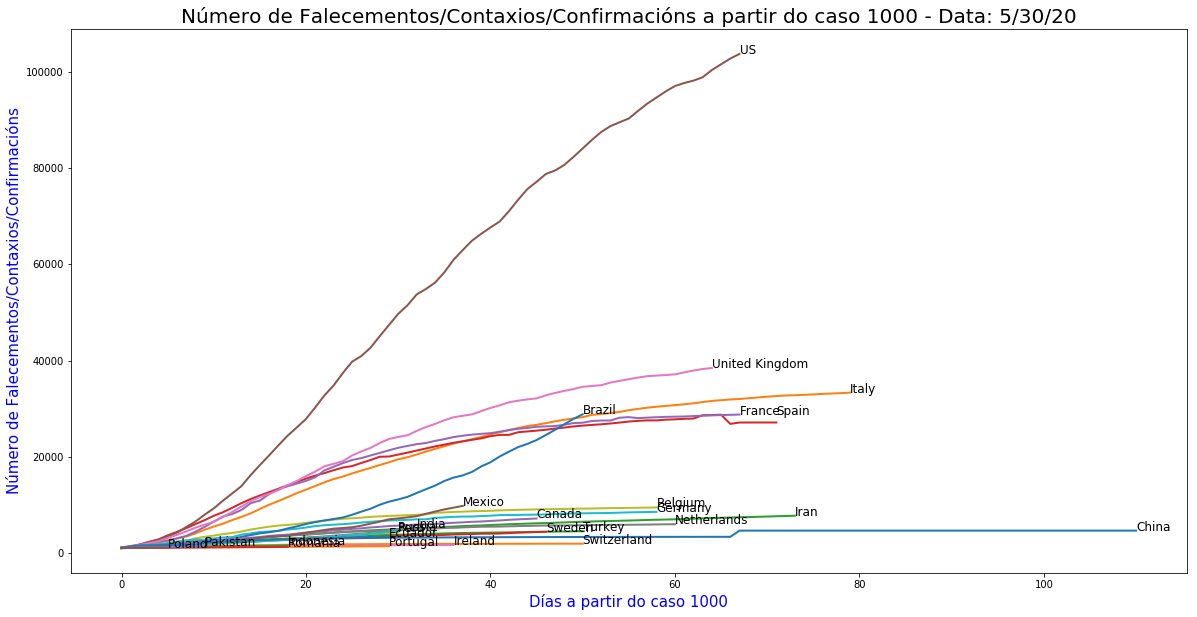

In [238]:
fig, ax = plt.subplots(figsize=(20,10))

for i in listaPaises:
    dataPais=selPaises.loc[allData2['Country/Region']==i]
    numDias, _ = dataPais.shape
    dias=np.arange(0,numDias)
    ax.plot(dias,dataPais['Valor'],label=i,linewidth=2)
    ax.annotate(str(i), (np.amax(dias), np.amax(dataPais['Valor'])),size=12)
#No caso de preferir lenda que anotación
#legend = ax.legend(shadow=True, framealpha=0.5,labelspacing=1,fontsize='xx-large',loc='right')
ax.set_title("Número de Falecementos/Contaxios/Confirmacións a partir do caso "
             +str(NUM_CASOS)+" - Data: "+hoxe,fontsize=20)
ax.set_xlabel("Días a partir do caso "+str(NUM_CASOS),fontsize=15,color='b')
ax.set_ylabel("Número de Falecementos/Contaxios/Confirmacións",fontsize=15,color='b')
plt.show()


### Debuxamos os datos en escala Logarítmica

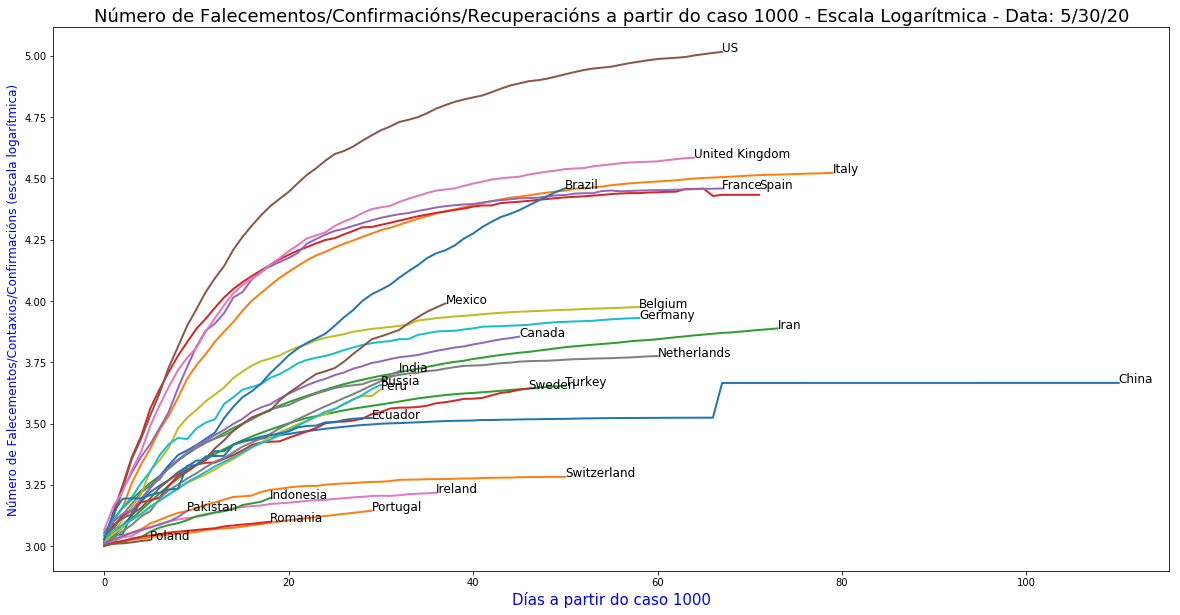

In [239]:

fig, ax = plt.subplots(figsize=(20,10))

for i in listaPaises:
    dataPais=selPaises.loc[allData2['Country/Region']==i]
    numDias, _ = dataPais.shape
    dias=np.arange(0,numDias)
    ax.plot(dias,np.log10(dataPais['Valor']),linewidth=2)
    ax.annotate(str(i), (np.amax(dias), np.amax(np.log10(dataPais['Valor']))),size=12)

ax.set_title("Número de Falecementos/Confirmacións/Recuperacións a partir do caso "+str(NUM_CASOS)+
             " - Escala Logarítmica"+" - Data: "+hoxe,fontsize=18)
ax.set_xlabel("Días a partir do caso "+str(NUM_CASOS),fontsize=15,color='b')
ax.set_ylabel("Número de Falecementos/Contaxios/Confirmacións (escala logarítmica)",fontsize=12,color='b')
plt.show()


### Destaque dun País Dado

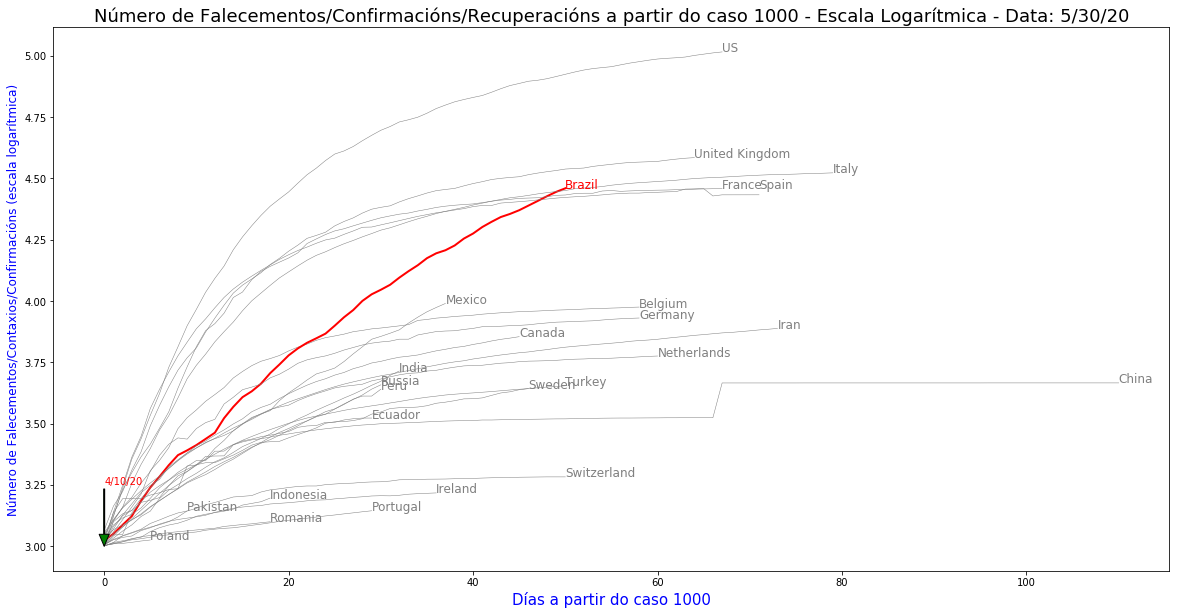

In [277]:
fig, ax = plt.subplots(figsize=(20,10))
Pais2='Brazil'

for i in listaPaises:
    dataPais=selPaises.loc[allData2['Country/Region']==i]
    numDias, _ = dataPais.shape
    dias=np.arange(0,numDias)
    if i==Pais2:
        cor='red'
        linha=2
    else:
        cor='gray'
        linha=0.5
    
    ax.plot(dias,np.log10(dataPais['Valor']),linewidth=linha,color=cor)
    ax.annotate(str(i), (np.amax(dias), np.amax(np.log10(dataPais['Valor']))),size=12,color=cor)
    if i==Pais2:
        primerDia=list(dataPais['Día'])[0]
        ax.annotate(primerDia, xy=(0, np.log10(NUM_CASOS)), xytext=(0, np.log10(NUM_CASOS)+0.25),
            arrowprops=dict(facecolor='green',width=1,headwidth=10),color='red')
    
ax.set_title("Número de Falecementos/Confirmacións/Recuperacións a partir do caso "+str(NUM_CASOS)+
             " - Escala Logarítmica"+" - Data: "+hoxe,fontsize=18)
ax.set_xlabel("Días a partir do caso "+str(NUM_CASOS),fontsize=15,color='b')
ax.set_ylabel("Número de Falecementos/Contaxios/Confirmacións (escala logarítmica)",fontsize=12,color='b')
plt.show()


### Regresión entre Contaxios e Falecementos

In [241]:
datosContaxios=pd.read_csv(fileContaxios,usecols = lambda column : column in ["Province/State" , "Country/Region",hoxe],keep_default_na=False)
datosContaxiosCor=datosContaxios.groupby('Country/Region').sum().reset_index()
datosFalecementos=pd.read_csv(fileFalecementos,usecols = lambda column : column in ["Province/State" , "Country/Region",hoxe],keep_default_na=False)
datosFalecementosCor=datosFalecementos.groupby('Country/Region').sum().reset_index()
selPaisesFalec=datosFalecementosCor.loc[(datosFalecementosCor[hoxe]>NUM_CASOS)]
listaPaises=list(selPaisesFalec['Country/Region'].unique())
#selPaisesFalec['Contaxios']=np.where(selPaisesFalec['Country/Region'] == datosContaxiosCor['Country/Region'],
#                                     datosContaxiosCor['Country/Region'], 'False')


In [242]:
datosXuntos = pd.merge(selPaisesFalec, datosContaxiosCor, how='inner', on=['Country/Region', 'Country/Region'])
datosXuntos.rename(columns={'Country/Region':'Country/Region',hoxe+"_x":'Falecementos',hoxe+"_y":'Contaxios'},inplace=True)
datosXuntos

,Country/Region,Falecementos,Contaxios
0,Belgium,9453,58186
1,Brazil,28834,498440
2,Canada,7159,91681
3,China,4638,84128
4,Ecuador,3334,38571
5,France,28774,188752
6,Germany,8530,183189
7,India,5185,181827
8,Indonesia,1573,25773
9,Iran,7734,148950


### Regresión con US (escala logarítmica) e sen US

In [243]:
datosXuntosSenUs=datosXuntos.drop(datosXuntos.loc[datosXuntos['Country/Region']=='US'].index)
#Actualizo os índices para que non haxa saltos (e pode anotar sen problema)
datosXuntosSenUs=datosXuntosSenUs.reset_index(drop=True)
datosXuntosSenUs

,Country/Region,Falecementos,Contaxios
0,Belgium,9453,58186
1,Brazil,28834,498440
2,Canada,7159,91681
3,China,4638,84128
4,Ecuador,3334,38571
5,France,28774,188752
6,Germany,8530,183189
7,India,5185,181827
8,Indonesia,1573,25773
9,Iran,7734,148950


#### Gráfico 1 - Con USA e en escala logarítmica // Gráfico 2 - sen USA 

Text(0.5,1,'Regresión Lineal Contaxios vs Falecementos (sen USA)')

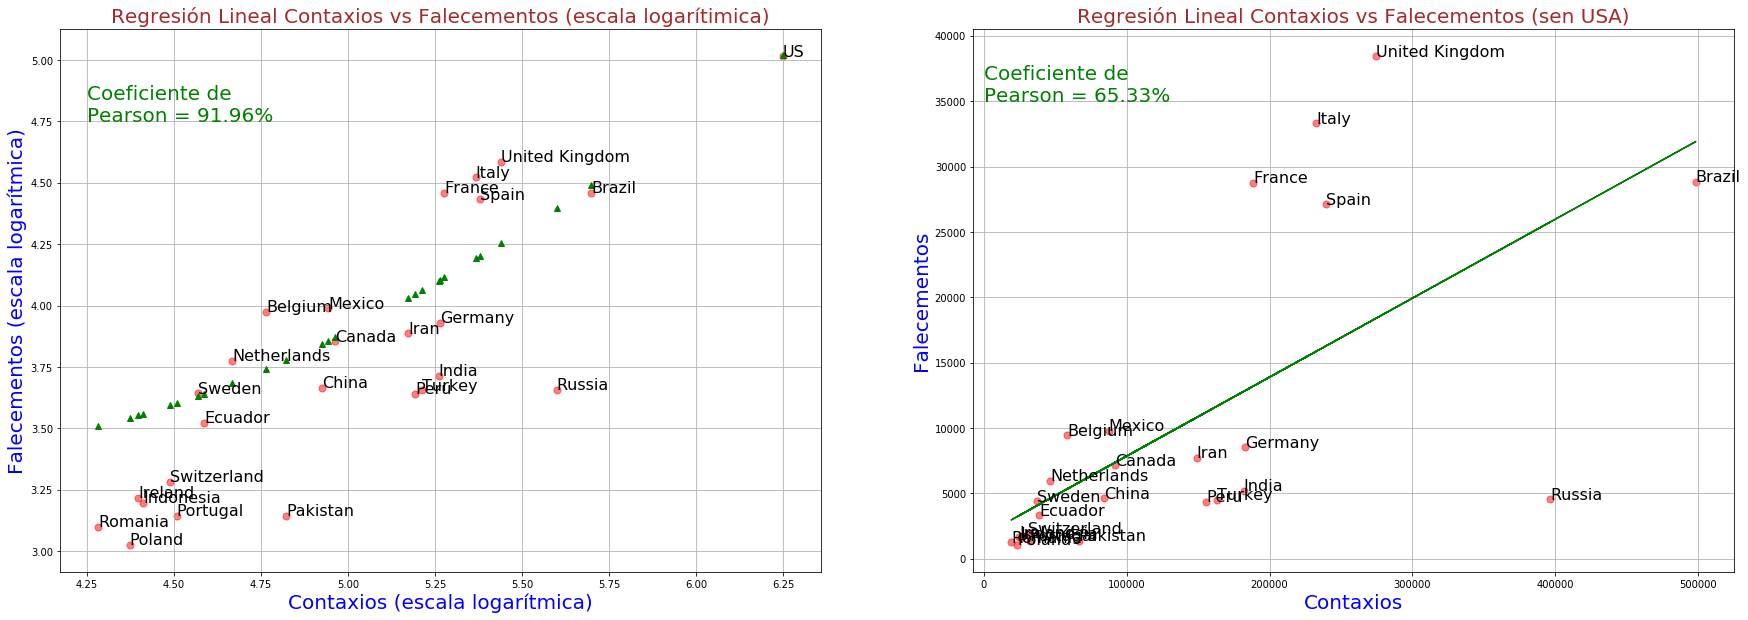

In [280]:
from scipy import stats
#Inicialización do Gráfico
fig, (eixos1,eixos2)=plt.subplots(1,2,figsize=(30, 10))


#Axuste lineal
m, n = np.polyfit(datosXuntos['Contaxios'], datosXuntos['Falecementos'],1)
eixos1.plot(np.log10(datosXuntos['Contaxios']),np.log10(m*datosXuntos['Contaxios']+n),'g^')
    
#Coeficiente de Pearson
r,_  = stats.pearsonr(datosXuntos['Contaxios'],datosXuntos['Falecementos'])
textoAxuste="Coeficiente de \nPearson = {:.2f}%".format(r*100)
#Axustamos os puntos ao tamaño da poboación
sizePoints=50
#Representación das variables
eixos1.scatter(np.log10(datosXuntos['Contaxios']),np.log10(datosXuntos['Falecementos']),
              color='r',alpha=0.5,s=sizePoints)
#Colocar etiquetas en cada punto
for k in range(datosXuntos['Country/Region'].__len__()):
    eixos1.annotate(datosXuntos['Country/Region'][k], (np.log10(datosXuntos['Contaxios'][k]),
                    np.log10(datosXuntos['Falecementos'][k])),size=16)
#Mostrar grade
eixos1.grid()
eixos1.set_xlabel("Contaxios (escala logarítmica)",size=20,color='b')    
eixos1.set_ylabel("Falecementos (escala logarítmica)",size=20,color='b')
eixos1.text(4.25, 4.75, textoAxuste, horizontalalignment='left', size=20, color='g')
eixos1.set_title("Regresión Lineal Contaxios vs Falecementos (escala logarítimica)",size=20, color='brown')

#No segundo gráfico elimino US

m, n = np.polyfit(datosXuntosSenUs['Contaxios'], datosXuntosSenUs['Falecementos'],1)
eixos2.plot(datosXuntosSenUs['Contaxios'],m*datosXuntosSenUs['Contaxios']+n,'g')
    
#Coeficiente de Pearson
r,_  = stats.pearsonr(datosXuntosSenUs['Contaxios'],datosXuntosSenUs['Falecementos'])
textoAxuste="Coeficiente de \nPearson = {:.2f}%".format(r*100)
#Axustamos os puntos ao tamaño da poboación
sizePoints=50
#Representación das variables
eixos2.scatter(datosXuntosSenUs['Contaxios'],datosXuntosSenUs['Falecementos'],
              color='r',alpha=0.5,s=sizePoints)
#Colocar etiquetas en cada punto
for k in range(datosXuntosSenUs['Country/Region'].__len__()):
    eixos2.annotate(datosXuntosSenUs['Country/Region'][k], 
                    (datosXuntosSenUs['Contaxios'][k], datosXuntosSenUs['Falecementos'][k]),size=16)
#Mostrar grade
eixos2.grid()
eixos2.set_xlabel("Contaxios",size=20,color='b')    
eixos2.set_ylabel("Falecementos",size=20,color='b')
eixos2.text(0, 35000, textoAxuste, horizontalalignment='left', size=20, color='g')
eixos2.set_title("Regresión Lineal Contaxios vs Falecementos (sen USA)",size=20, color='brown')